In [47]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web

In [48]:
plt.style.use('dark_background')

ma_1 = 30
ma_2 = 100

start = dt.datetime.now() - dt.timedelta(days=365 * 3)
end =dt.datetime.now()

data= web.DataReader("005930.KS","yahoo",start,end)
data[f'SMA_{ma_1}'] = data['Adj Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Adj Close'].rolling(window=ma_2).mean()

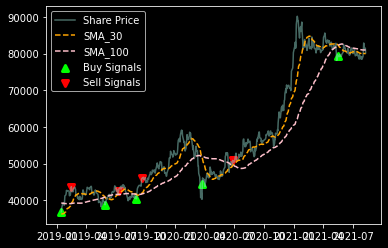

In [49]:
data = data.iloc[ma_2:]

buy_signals = []
sell_signals = []
trigger = 0

for x in range(len(data)):
    if data[f"SMA_{ma_1}"].iloc[x]<data[f"SMA_{ma_2}"].iloc[x] and trigger != 1:
        buy_signals.append(data['Adj Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = 1
    elif data[f"SMA_{ma_1}"].iloc[x]>data[f"SMA_{ma_2}"].iloc[x] and trigger != -1:
        buy_signals.append(float('nan'))
        sell_signals.append(data['Adj Close'].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))

data['Buy Signals']=buy_signals
data['Sell Signals']=sell_signals

plt.plot(data['Adj Close'],label="Share Price",alpha=0.5)
plt.plot(data[f"SMA_{ma_1}"],label=f"SMA_{ma_1}",color="orange",linestyle="--")
plt.plot(data[f"SMA_{ma_2}"],label=f"SMA_{ma_2}",color="pink",linestyle="--")
plt.scatter(data.index,data['Buy Signals'],label="Buy Signals",marker="^",color="#00ff00",lw=3)
plt.scatter(data.index,data['Sell Signals'],label="Sell Signals",marker="v",color="#ff0000",lw=3)
plt.legend(loc="upper left")
plt.show()